# Manufacturing Product Quality Rating Prediction

# Importing required libraries.

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_absolute_percentage_error
from xgboost import XGBRegressor

### Problem statement -  Quality Rating prediction

## Step 1 : Data Gathering

In [64]:
df = pd.read_csv('manufacturing.csv')
df.head(10)

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
0,209.762701,8.050855,1688.769167,44522.217074,9.229576e+06,99.999971
1,243.037873,15.812068,3842.931469,63020.764997,1.435537e+07,99.985703
2,220.552675,7.843130,1729.823314,49125.950249,1.072839e+07,99.999758
3,208.976637,23.786089,4970.736918,57128.881547,9.125702e+06,99.999975
4,184.730960,15.797812,2918.345014,38068.201283,6.303792e+06,100.000000
5,229.178823,8.498306,1947.631786,53136.690654,1.203707e+07,99.998786
6,187.517442,19.412851,3640.248155,42478.694500,6.593260e+06,100.000000
7,278.354600,7.070944,1968.229758,77834.818230,2.156722e+07,95.732723
8,292.732552,20.432896,5981.373734,94223.147069,2.508452e+07,64.623599
9,176.688304,14.145782,2499.394266,34049.372335,5.515789e+06,100.000000


### The manufacturing dataset consists of the following columns:

1.	Temperature (°C): This column represents the temperature during the manufacturing process, 
measured in degrees Celsius. Temperature plays a critical role in many manufacturing processes, 
influencing material properties and product quality.

2.	Pressure (kPa): The pressure applied during the manufacturing process, measured in kilopascals (kPa). 
Pressure can affect the material transformation and the overall outcome of the manufacturing process.

3.	Temperature x Pressure: This feature is an interaction term between temperature and pressure,
which captures the combined effect of these two process parameters.

4.	Material Fusion Metric: A derived metric calculated as the sum of the square of temperature and the cube of pressure.
It represents a material fusion-related measurement during the manufacturing process.

5.	Material Transformation Metric: Another derived metric calculated as the cube of temperature minus the square of pressure. It provides insight into material transformation dynamics.

6.	Quality Rating: The target variable, 'Quality Rating,' represents the overall quality rating of the produced items. Quality is a crucial aspect of manufacturing, and this rating serves as a measure of the final product's quality.


##  Step 2:EDA - Explore the data

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3957 entries, 0 to 3956
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Temperature (°C)                3957 non-null   float64
 1   Pressure (kPa)                  3957 non-null   float64
 2   Temperature x Pressure          3957 non-null   float64
 3   Material Fusion Metric          3957 non-null   float64
 4   Material Transformation Metric  3957 non-null   float64
 5   Quality Rating                  3957 non-null   float64
dtypes: float64(6)
memory usage: 185.6 KB


In [66]:
df.describe()

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
count,3957.000000,3957.000000,3957.000000,3957.000000,3.957000e+03,3957.000000
mean,200.034704,14.815558,2955.321308,48127.183128,1.003645e+07,96.260179
std,58.135717,5.772040,1458.224940,23812.213513,7.599356e+06,12.992262
min,100.014490,5.003008,513.706875,10156.971955,9.999462e+05,1.000000
25%,150.871296,9.692984,1798.247303,27626.929091,3.433810e+06,99.941129
50%,198.603371,14.832557,2678.277782,44611.452164,7.833390e+06,99.999997
75%,251.366552,19.749680,3929.058261,67805.443846,1.588251e+07,100.000000
max,299.992804,24.999132,7365.018714,103756.181544,2.699783e+07,100.000000


/Users/vishalpatel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


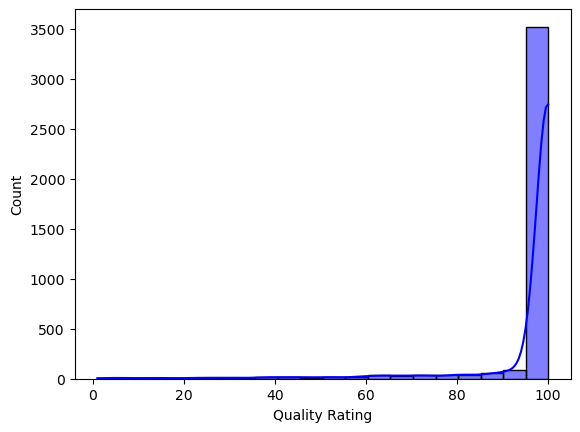

In [67]:
# Assuming df is your DataFrame and 'Quality Rating' is the column you want to plot
sns.histplot(df['Quality Rating'], bins=20, kde=True, color='blue')

plt.show()


In [68]:
df.isna().sum()

Temperature (°C)                  0
Pressure (kPa)                    0
Temperature x Pressure            0
Material Fusion Metric            0
Material Transformation Metric    0
Quality Rating                    0
dtype: int64

#### Checking data for Outliers

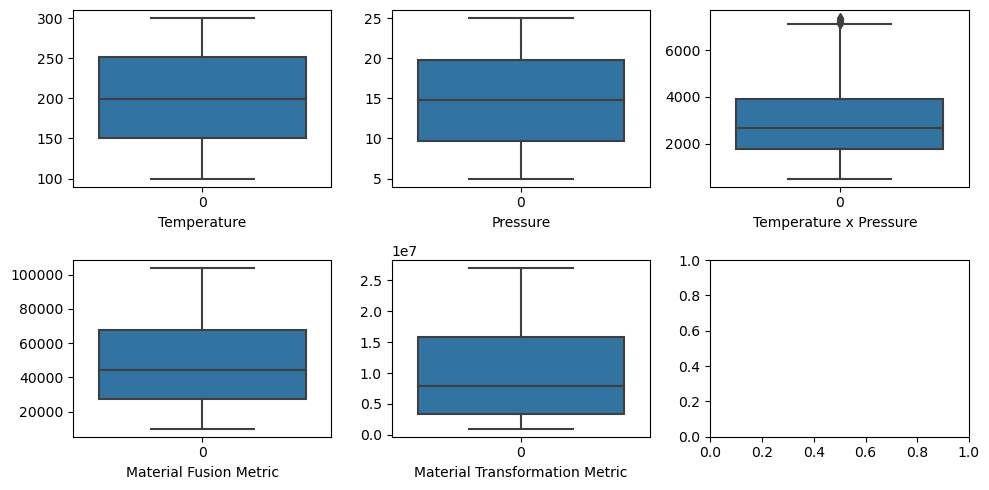

In [69]:
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(df['Temperature (°C)'], ax = axs[0,0]).set(xlabel= 'Temperature')
plt2 = sns.boxplot(df['Pressure (kPa)'], ax = axs[0,1]).set(xlabel='Pressure')
plt3 = sns.boxplot(df['Temperature x Pressure'], ax = axs[0,2]).set(xlabel='Temperature x Pressure  ')
plt1 = sns.boxplot(df['Material Fusion Metric'], ax = axs[1,0]).set(xlabel='Material Fusion Metric')
plt2 = sns.boxplot(df['Material Transformation Metric'], ax = axs[1,1]).set(xlabel='Material Transformation Metric')

plt.tight_layout()

<Axes: >

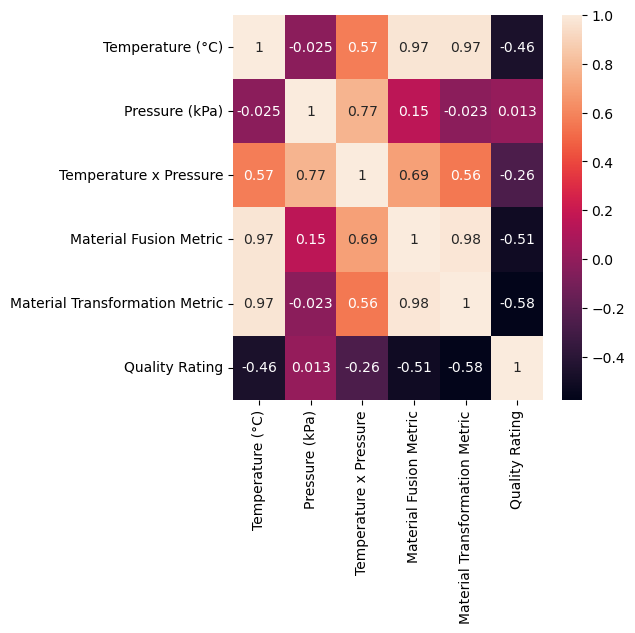

In [70]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(),annot=True)

## Step 3: Train test split 

In [71]:
df.head()

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
0,209.762701,8.050855,1688.769167,44522.217074,9.229576e+06,99.999971
1,243.037873,15.812068,3842.931469,63020.764997,1.435537e+07,99.985703
2,220.552675,7.843130,1729.823314,49125.950249,1.072839e+07,99.999758
3,208.976637,23.786089,4970.736918,57128.881547,9.125702e+06,99.999975
4,184.730960,15.797812,2918.345014,38068.201283,6.303792e+06,100.000000


In [72]:
numerical_features = ['Temperature (°C)','Pressure (kPa)','Temperature x Pressure','Material Fusion Metric','Material Transformation Metric']

In [73]:
def train_test_split_data(df):
    y = df["Quality Rating"]
    x = df.drop('Quality Rating',axis=1)
    features = list(x.columns)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 0)
    return x_train, x_test, y_train, y_test,features

In [74]:
x_train, x_test, y_train, y_test,features = train_test_split_data(df)

In [75]:
x_train.head(10)

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric
3713,195.047668,10.725532,2091.990056,39277.426200,7.420199e+06
713,191.281913,20.549397,3930.727882,45266.322135,6.998348e+06
3819,178.227142,24.033257,4283.378732,45646.462194,5.660792e+06
3584,150.036001,15.002019,2250.842973,25887.164865,3.377206e+06
2294,197.686618,14.180148,2803.225454,41931.294556,7.725392e+06
1084,272.224602,15.941536,4339.678299,78157.497273,2.017329e+07
1388,120.221498,20.745969,2494.111417,23382.174098,1.737156e+06
361,280.796791,11.067122,3107.612368,80202.352126,2.213982e+07
3687,225.307042,7.383163,1663.478696,51165.727589,1.143727e+07
1368,258.656335,13.168546,3406.127843,69186.664922,1.730474e+07


##  Step 4: Train and evaluate the model

In [76]:
param_grid = [{'learning_rate': [0.1, 0.2, 0.3],
               'max_depth': [3,4,5],
               'subsample': [0.8, 0.9],
               'colsample_bytree': [0.8, 0.9],
               'n_estimators' : [50]}
             ]

In [77]:
from sklearn.model_selection import GridSearchCV
model = XGBRegressor(random_state=0)
search = GridSearchCV(estimator = model, param_grid = param_grid, cv=5, verbose=5, scoring = 'r2')
search.fit(x_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8;, score=0.997 total time=   0.0s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8;, score=0.998 total time=   0.0s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8;, score=0.998 total time=   0.0s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8;, score=0.999 total time=   0.0s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8;, score=0.999 total time=   0.0s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.9;, score=0.997 total time=   0.0s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.9;, score=0.998 total time=   0.0s
[CV 3/5] END colsampl

[CV 3/5] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, n_estimators=50, subsample=0.9;, score=0.999 total time=   0.0s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, n_estimators=50, subsample=0.9;, score=0.998 total time=   0.0s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, n_estimators=50, subsample=0.9;, score=0.999 total time=   0.0s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, n_estimators=50, subsample=0.8;, score=0.997 total time=   0.0s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, n_estimators=50, subsample=0.8;, score=0.998 total time=   0.0s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, n_estimators=50, subsample=0.8;, score=0.999 total time=   0.0s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, n_estimators=50, subsample=0.8;, score=0.998 total time=   0.0s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, n_estimators=50,

[CV 5/5] END colsample_bytree=0.9, learning_rate=0.2, max_depth=4, n_estimators=50, subsample=0.8;, score=0.999 total time=   0.0s
[CV 1/5] END colsample_bytree=0.9, learning_rate=0.2, max_depth=4, n_estimators=50, subsample=0.9;, score=0.997 total time=   0.0s
[CV 2/5] END colsample_bytree=0.9, learning_rate=0.2, max_depth=4, n_estimators=50, subsample=0.9;, score=0.998 total time=   0.0s
[CV 3/5] END colsample_bytree=0.9, learning_rate=0.2, max_depth=4, n_estimators=50, subsample=0.9;, score=0.999 total time=   0.0s
[CV 4/5] END colsample_bytree=0.9, learning_rate=0.2, max_depth=4, n_estimators=50, subsample=0.9;, score=0.998 total time=   0.0s
[CV 5/5] END colsample_bytree=0.9, learning_rate=0.2, max_depth=4, n_estimators=50, subsample=0.9;, score=0.999 total time=   0.0s
[CV 1/5] END colsample_bytree=0.9, learning_rate=0.2, max_depth=5, n_estimators=50, subsample=0.8;, score=0.997 total time=   0.0s
[CV 2/5] END colsample_bytree=0.9, learning_rate=0.2, max_depth=5, n_estimators=50,

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=0, ...),
             param_grid=[{'colsample_bytree': [0.8, 0.9],
                          'learning_rate': [0.1, 0.2, 0.3],
                          'max_depth': [3, 4, 5], 'n_estimators': [50],
                          'subsample': [0.8, 0.9]}],
             scoring='r2', verbose=5)

In [78]:
results = pd.DataFrame(search.cv_results_)
results.sort_values('mean_test_score',inplace=True,ascending= False)
results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_learning_rate,param_max_depth,param_n_estimators,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
9,0.014343,0.003811,0.000991,0.000269,0.8,0.2,4,50,0.9,"{'colsample_bytree': 0.8, 'learning_rate': 0.2...",0.997318,0.997972,0.998887,0.998491,0.998825,0.998298,0.000588,1
27,0.010915,0.000391,0.000768,0.000097,0.9,0.2,4,50,0.9,"{'colsample_bytree': 0.9, 'learning_rate': 0.2...",0.997318,0.997972,0.998887,0.998491,0.998825,0.998298,0.000588,1
29,0.012285,0.000730,0.000694,0.000037,0.9,0.2,5,50,0.9,"{'colsample_bytree': 0.9, 'learning_rate': 0.2...",0.997177,0.997905,0.999130,0.998352,0.998819,0.998277,0.000689,3
11,0.018249,0.002987,0.000848,0.000088,0.8,0.2,5,50,0.9,"{'colsample_bytree': 0.8, 'learning_rate': 0.2...",0.997177,0.997905,0.999130,0.998352,0.998819,0.998277,0.000689,3
7,0.011036,0.005231,0.000758,0.000152,0.8,0.2,3,50,0.9,"{'colsample_bytree': 0.8, 'learning_rate': 0.2...",0.997335,0.997951,0.998706,0.998624,0.998729,0.998269,0.000548,5
25,0.012204,0.005071,0.001083,0.000373,0.9,0.2,3,50,0.9,"{'colsample_bytree': 0.9, 'learning_rate': 0.2...",0.997335,0.997951,0.998706,0.998624,0.998729,0.998269,0.000548,5
6,0.012287,0.004047,0.000816,0.000209,0.8,0.2,3,50,0.8,"{'colsample_bytree': 0.8, 'learning_rate': 0.2...",0.997094,0.997971,0.998803,0.998610,0.998754,0.998246,0.000649,7
24,0.014805,0.006874,0.000848,0.000213,0.9,0.2,3,50,0.8,"{'colsample_bytree': 0.9, 'learning_rate': 0.2...",0.997094,0.997971,0.998803,0.998610,0.998754,0.998246,0.000649,7
1,0.009048,0.001399,0.000924,0.000436,0.8,0.1,3,50,0.9,"{'colsample_bytree': 0.8, 'learning_rate': 0.1...",0.996888,0.998405,0.998456,0.998740,0.998586,0.998215,0.000673,9
19,0.009159,0.001003,0.000762,0.000120,0.9,0.1,3,50,0.9,"{'colsample_bytree': 0.9, 'learning_rate': 0.1...",0.996888,0.998405,0.998456,0.998740,0.998586,0.998215,0.000673,9


In [79]:
search.best_params_

{'colsample_bytree': 0.8,
 'learning_rate': 0.2,
 'max_depth': 4,
 'n_estimators': 50,
 'subsample': 0.9}

## Lets train model again with these best param

In [80]:
model = XGBRegressor(colsample_bytree= 0.8, learning_rate = 0.2, max_depth = 5, n_estimators = 50, subsample = 0.8)
model.fit(x_train, y_train)
xgb_predict = model.predict(x_test)

In [81]:
r2_score(y_test, xgb_predict)

0.9972933877431843

In [82]:
mean_absolute_percentage_error(y_test, xgb_predict)

0.00506799378611664

# Step 5: Get important features

In [83]:
importances = pd.DataFrame(model.feature_importances_)
importances['features'] = features
importances.columns = ['importance','feature']
importances.sort_values(by = 'importance', ascending= True,inplace=True)
importances.head(10)

,importance,feature
3,0.000464,Material Fusion Metric
1,0.000547,Pressure (kPa)
2,0.000663,Temperature x Pressure
4,0.357973,Material Transformation Metric
0,0.640353,Temperature (°C)


<BarContainer object of 5 artists>

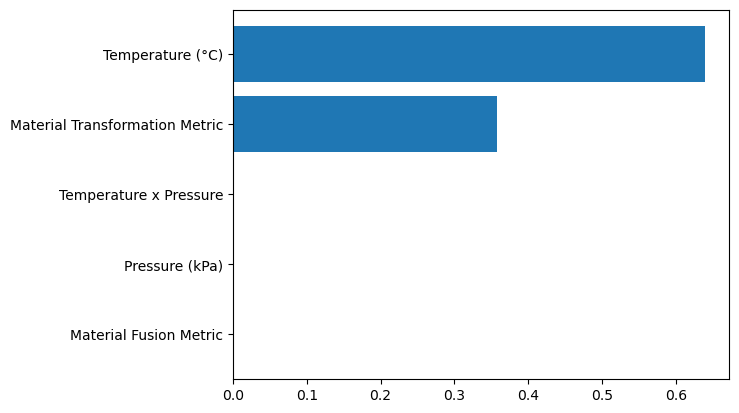

In [84]:
import matplotlib.pyplot as plt
plt.barh(importances.feature, importances.importance)

## let's train model agaiin with these best features only.

# Step 6: Retrain and evaluate the model

In [85]:
x_train = x_train[['Temperature (°C)','Material Transformation Metric']]
x_test = x_test[['Temperature (°C)','Material Transformation Metric']]

In [86]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming x_train, y_train, x_test, y_test are already defined

# Fit the model
model = XGBRegressor(colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=50, subsample=0.8)
model.fit(x_train, y_train)

# Make predictions
train_predictions = model.predict(x_train)
test_predictions = model.predict(x_test)

# Calculate metrics for the training set
train_mae = mean_absolute_error(y_train, train_predictions)
train_mse = mean_squared_error(y_train, train_predictions)
train_r2 = r2_score(y_train, train_predictions)

# Calculate metrics for the test set
test_mae = mean_absolute_error(y_test, test_predictions)
test_mse = mean_squared_error(y_test, test_predictions)
test_r2 = r2_score(y_test, test_predictions)

# Print the results
print("Training Set Performance:")
print(f"MAE: {train_mae}")
print(f"MSE: {train_mse}")
print(f"R²: {train_r2}")

print("\nTest Set Performance:")
print(f"MAE: {test_mae}")
print(f"MSE: {test_mse}")
print(f"R²: {test_r2}")


Training Set Performance:
MAE: 0.10445215329430231
MSE: 0.232064005454803
R²: 0.9986112836172436

Test Set Performance:
MAE: 0.12389964943767638
MSE: 0.26821730295793217
R²: 0.9984699525794362


## We can see our model is performing best on bothe train and test data by giving 99% r2 score.

In [87]:
importances = pd.DataFrame(model.feature_importances_)
importances['features'] = ['Temperature (°C)','Material Transformation Metric']
importances.columns = ['importance','feature']
importances.sort_values(by = 'importance', ascending= True,inplace=True)
importances.head(10)

,importance,feature
0,0.261085,Temperature (°C)
1,0.738915,Material Transformation Metric


## Lets try other algorithms.

In [88]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define a function to evaluate a model and return results as a dictionary
def evaluate_model(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    
    train_predictions = model.predict(x_train)
    test_predictions = model.predict(x_test)
    
    train_mae = mean_absolute_error(y_train, train_predictions)
    train_mse = mean_squared_error(y_train, train_predictions)
    train_r2 = r2_score(y_train, train_predictions)
    
    test_mae = mean_absolute_error(y_test, test_predictions)
    test_mse = mean_squared_error(y_test, test_predictions)
    test_r2 = r2_score(y_test, test_predictions)
    
    return {
        'Model': model.__class__.__name__,
        'Train MAE': train_mae,
        'Train MSE': train_mse,
        'Train R²': train_r2,
        'Test MAE': test_mae,
        'Test MSE': test_mse,
        'Test R²': test_r2
    }

# List of models to evaluate
models = [
    LinearRegression(),
    RandomForestRegressor(n_estimators=100),
    SVR(kernel='rbf', C=1.0, epsilon=0.2),
    XGBRegressor(colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=50, subsample=0.8)
]

# Evaluate each model and collect results
results = []
for model in models:
    results.append(evaluate_model(model, x_train, y_train, x_test, y_test))
print(results[0])
# Convert results to DataFrame and save to CSV
results_df = pd.DataFrame(results)
results_df.to_csv('model_performance.csv', index=False)


{'Model': 'LinearRegression', 'Train MAE': 5.692914701706575, 'Train MSE': 84.21582917679042, 'Train R²': 0.4960360119786176, 'Test MAE': 5.820128547448373, 'Test MSE': 84.72310428839248, 'Test R²': 0.516696478008563}


In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the results from CSV
results_df = pd.read_csv('model_performance.csv')

results_df.head()



,Model,Train MAE,Train MSE,Train R²,Test MAE,Test MSE,Test R²
0,LinearRegression,5.692915,84.215829,0.496036,5.820129,84.723104,0.516696
1,RandomForestRegressor,0.004465,0.000532,0.999997,0.016206,0.009344,0.999947
2,SVR,1.602935,42.505386,0.745639,1.687585,42.493913,0.757593
3,XGBRegressor,0.104452,0.232064,0.998611,0.123900,0.268217,0.998470


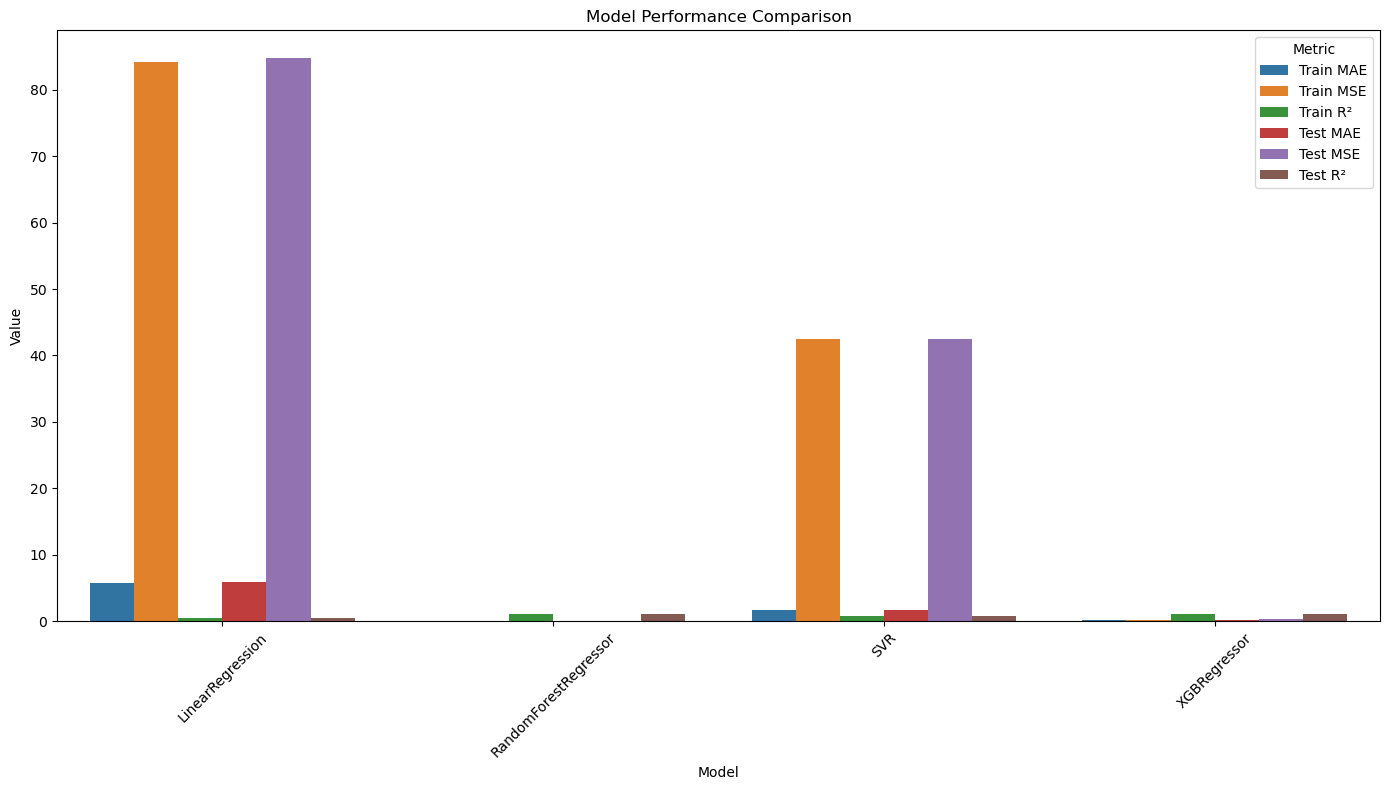

In [90]:
# Melt the DataFrame for easier plotting with Seaborn
melted_df = results_df.melt(id_vars=['Model'], var_name='Metric', value_name='Value')

# Plot the results
plt.figure(figsize=(14, 8))
sns.barplot(data=melted_df, x='Model', y='Value', hue='Metric')
plt.title('Model Performance Comparison')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Given these results, Random Forest Regressor and XGBoost Regressor are the recommended models for this dataset due to their superior performance metrics.